<a href="https://colab.research.google.com/github/Jom123410/280222/blob/master/CIDM6351_Homework_3_Transform_Data_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CIDM6351 Homework 3 Transform Data instructions  

In this homework, you will apply transformation operations on various datasets and answer some questions about the data.

TASK:   
1. Copy and save a copy of this Google Colab notebook
2. Change the Share's General Access to "Anyone with a link" so that the professor can see your code
3. When done, deliver the URL of your notebook to \\WTclass\cidm6351\lessons\Week 9\Turn in Homework 3\

Purpose: After loading and cleaning data, the next operation usually required by data engineers is to transform the data. Transform means to change the dataset, e.g., create new columns or group by rows.

## Analyze the Bike Rental Market in Seoul Korea.
The city has a bike rental option to aid public transport. Load, clean, transform the data to perform a useful analysis. <br>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/97/North_Korea_Bike_Tour_%2814115456159%29.jpg" height="100px" alt="bikes"><br>

Photo: Uri Tours (uritours.com), CC BY-SA 2.0 <https://creativecommons.org/licenses/by-sa/2.0>, via Wikimedia Commons.

The original author and source of the data is found here: <https://www.kaggle.com/datasets/willianoliveiragibin/bike-seoul-sharing/?select=SeoulBikeData.csv>

## Task 1: Load the data

Import the Seoul Korea Bike data into a pandas dataframe. The URL to the raw data on github is already provided for you in the code below. Inspect the data with .head and .info.

Data dictionary:  
Rented bike count is the number of bikes rented. <br>
Date is the day of the rental. Notice the date format is day, month, year DD/MM/YYYY.  <br>
Hour is the hour of the day in 24-hour military time, e.g. 12 is noon and 23 hours is 11pm.  <br>
Temperature is the ambient temperature in Celsius.  <br>
To see the other columns, visit the kaggle.com website click the Column's tab to see a list of the columns and their unit of measure.




In [1]:
import pandas as pd

In [2]:
seoul_bike_data_url = 'https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/seoulbikedata.csv'
seoul_bike_data = pd.read_csv(seoul_bike_data_url)



In [3]:
print(seoul_bike_data.head())
print(seoul_bike_data.info())

         Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1           

## Task 2: Transform Columns

Transform your data by removing unneeded columns. Remove all columns except Date, Rented Bike Count, Hour, Temperature(C). Rename Temperature(C) to just Temperature.

In [4]:
seoul_bike_data = seoul_bike_data[['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)']]
seoul_bike_data.rename(columns={'Temperature(C)': 'Temperature'}, inplace=True)

<ipython-input-4-e7ac5d7633e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_bike_data.rename(columns={'Temperature(C)': 'Temperature'}, inplace=True)


## Task 3: Scatterplot

We want to answer "What happens to the rented bike count as the temperature change?" Create a simple scatterplot between rented bike count and temperature. Label your axis.

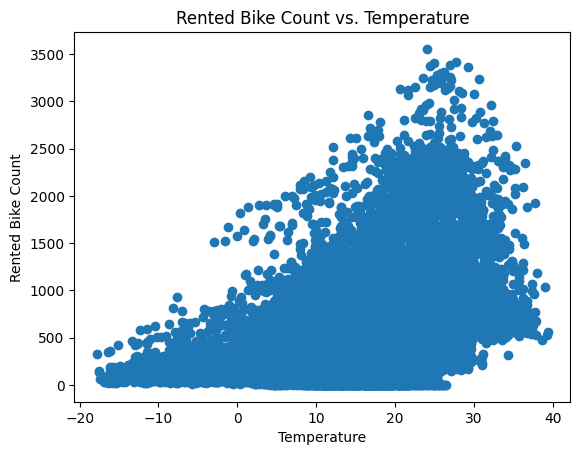

In [5]:
import matplotlib.pyplot as plt

plt.scatter(seoul_bike_data['Temperature'], seoul_bike_data['Rented Bike Count'])
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs. Temperature')
plt.show()




## Question 1: What happens to the rented bike count as the temperature change? <br>
Put your answer here: As the temperature decreases in the negative values, indicating cold weather conditions, the number of rented bikes tends to decrease. Suggesting that more people prefer to rent bikes during warmer temperatures. However, after a certain temperature threshold, the number of rented bikes may decrease, indicating that extremely hot temperatures might deter people from renting bikes. Conversely, during colder temperatures, fewer people might be inclined to rent bikes. <br>







## Task 4: Group By

Write code that groups the Seoul bike data by hour and sums the rented bike count for each hour. Use the entire dataset and do not filter rows or groupby day. Sort the data by rented bike count from highest sum of rental count to lowest rental count. Print a table that summarizes this data.

Hint: Datacamp taught you how to group by, but if you need a refresher search Google for "pandas groupby aggregate count".

In [6]:
hourly_rental_counts = seoul_bike_data.groupby('Hour')['Rented Bike Count'].sum().reset_index()
hourly_rental_counts = hourly_rental_counts.sort_values(by='Rented Bike Count', ascending=False)


In [7]:
print(hourly_rental_counts.head())

    Hour  Rented Bike Count
18    18             548568
19    19             436229
17    17             415556
20    20             390172
21    21             376479


## Question 2: What hours of the day have the highest bike rentals? <br>
Enter your answer here: Based on the data, the hours of the day with the highest bike rentals are 18:00 (6:00 PM) with 548,568 rentals, 19:00 (7:00 PM) with 436,229 rentals, 17:00 (5:00 PM) with 415,556 rentals. These times typically represent the evening rush hour when people are commuting back home or going out in the evening, which can explain the high number of bike rentals.  <br>




## Task 5: Read about How to Melt from Wide Format to Long Format
The Seoul Korea data is in a long format, e.g. each date/hour is a separate row. Sometimes our data comes in wide format (an example is provide shortly). As data engineers we have need to transform our data between long and wide format using Pandas melt and pivot methods. Long data is often prefered by machine learning tasks. Wide format is sometimes required for a statistical analysis for comparison of how data over time, e.g. how a student improves over time or how a patient loses weight from the start to end of a treatment program.

Task 5 is to just read this article on how to melt data from wide format to long format.
<https://www.kdnuggets.com/2023/03/beginner-guide-pandas-melt-function.html>

## Task 6: Load and Clean Data

Load the NBA data into a pandas dataframe using the URL provided. Inspect the data with .head and .info. Remove any empty data rows. <br>
Data Dictionary: <br>
NBA Player Name: first and last name of the player<br>
2020: count of Twitter messages for that year<br>
2021: count of Twitter messages for that year<br>
2022: count of Twitter messages for that year<br>
2023: count of Twitter messages for that year<br>


In [8]:

nba_player_twitter_count_url = 'https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/nba_player_twitter_count_data.csv'

nba_data = pd.read_csv(nba_player_twitter_count_url)



In [9]:
nba_data.dropna(inplace=True)

## Task 7: Melt

Melt the data from wide format into long format. The long-format dataset will have the columns "NBA Player Name", "Year", "Twitter Count".
Print the dataset to showcase your successful transformation.<br>
Example: <br>
NBA Player Name  Year Twitter Count<br>
Russell Westbrook  2020  413<br>
Russell Westbrook  2021  2857<br>
Russell Westbrook  2022  1156<br>
...<br>



In [10]:
nba_data_long = pd.melt(nba_data, id_vars=['NBA Player Name'], var_name='Year', value_name='Twitter Count')
nba_data_long['Year'] = nba_data_long['Year'].astype(int)



In [11]:
print(nba_data_long.head())

     NBA Player Name  Year  Twitter Count
0  Russell Westbrook  2020          413.0
1       James Harden  2020         2102.0
2      Isaiah Thomas  2020         2253.0
3      Anthony Davis  2020         2588.0
4      DeMar DeRozan  2020         2146.0


## DONE!

Upload the url of your notebook to WTclass.

## Grading Rubric:  

Each task is worth 10%. Each question is worth 15%.